In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
from optlssvm.lssvm import LSSVM
from optlssvm.orlssvm import OptimallyRegularizedLSSVM
from optlssvm.opt_rbf_lssvm import OptimallyRegularizedRBFLSSVM
from optlssvm.kernels import RBF

In [ ]:
import os
cwd = os.getcwd()
cwd

# LSSVM


---------- Initial Model -----------
Training.....


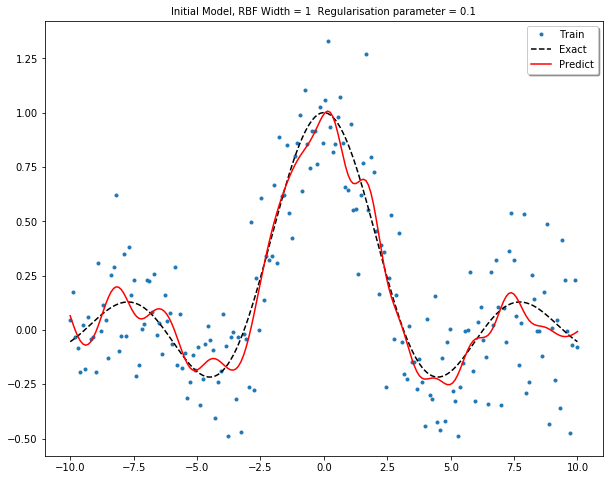

In [25]:

x0 = np.linspace(-10, 10, 200)
y0 = np.sin(x0) / x0
# plt.plot(x0,y0,'r-')
x = x0
y = y0 + np.random.normal(0, 0.2, len(x0))
# plt.plot(x,y,'go')
net = LSSVM(RBF(1), mu=0.1)
# x.shape = (len(x),1)

print("\n---------- Initial Model -----------")
print("Training.....")
net.fit(x.reshape(-1, 1), y)
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace = 0.3)
plt.plot(x, y, '.', label='Train')
plt.plot(x, y0, 'k--', label='Exact')
plt.plot(net.x, net.predict(x.reshape(-1,1)), '-r', label='Predict')
plt.title("Initial Model, "+ net.__str__(),fontsize=10)
plt.legend(loc='upper right', shadow=True)
plt.show()



# LSSVM: Optimal Regularisation 


finding best regularisation parameter, same RBF kernel 
optimalRegularisation
Mu= 0.0100  PRESS=11.394395
Mu= 0.0149  PRESS=11.299666
Mu= 0.0221  PRESS=11.204350
Mu= 0.0329  PRESS=11.107779
Mu= 0.0489  PRESS=11.009537
Mu= 0.0728  PRESS=10.909396
Mu= 0.1083  PRESS=10.807076
Mu= 0.1610  PRESS=10.702153
Mu= 0.2395  PRESS=10.594453
Mu= 0.3562  PRESS=10.485151
Mu= 0.5298  PRESS=10.378546
Mu= 0.7880  PRESS=10.284581
Mu= 1.1721  PRESS=10.222746
Mu= 1.7433  PRESS=10.228505
Mu= 2.5929  PRESS=10.362575
Mu= 3.8566  PRESS=10.719742
Mu= 5.7362  PRESS=11.427294
Mu= 8.5317  PRESS=12.618088
Mu= 12.6896  PRESS=14.371906
Mu= 18.8739  PRESS=16.648635
Mu= 28.0722  PRESS=19.265302
Mu= 41.7532  PRESS=21.950009
Mu= 62.1017  PRESS=24.441823
Mu= 92.3671  PRESS=26.568990
Mu= 137.3824  PRESS=28.268350
Mu= 204.3360  PRESS=29.559278
Mu= 303.9195  PRESS=30.504366
Mu= 452.0354  PRESS=31.178223
Mu= 672.3358  PRESS=31.649861
Mu= 1000.0000  PRESS=31.975753


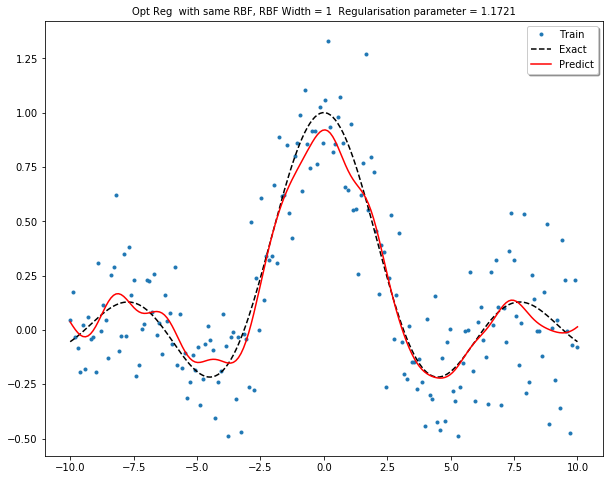

In [26]:
print("\nfinding best regularisation parameter, same RBF kernel ")
print("optimalRegularisation")
net = OptimallyRegularizedLSSVM(RBF(1), mu_values=np.logspace(-2,3,30))
# net = or_lssvm(RBF(1)) here mu_values is set to default
net.fit(x.reshape(-1, 1), y)
plt.figure(figsize=(10,8))
plt.plot(x, y, '.', label='Train')
plt.plot(x, y0, 'k--', label='Exact')
plt.plot(net.x, net.predict(x.reshape(-1,1)), '-r', label='Predict')
plt.title("Opt Reg  with same RBF, "+ net.__str__(),fontsize=10)
plt.legend(loc='upper right', shadow=True)
plt.show()




# RBF_LSSVM: Full optimisation of RBF width and regularisation parameter


In [28]:
print("\nfull optimisation RBF width and regularisation parameter")
net = OptimallyRegularizedRBFLSSVM( mu_values = np.logspace(-2,3,30), 
                     rbf_width_values = np.logspace(-2,2,20))
net.fit(x.reshape(-1,1),y)
plt.figure(figsize=(10,8))
plt.plot(x, y, '.', label='Train')
plt.plot(x, y0, 'k--', label='Exact')
plt.plot(net.x, net.predict(x.reshape(-1,1)), '-r', label='Predict')
plt.title("Full optim , "+ net.__str__(),fontsize=10)
plt.legend(loc='upper right', shadow=True)
plt.show()



full optimisation RBF width and regularisation parameter


TypeError: __init__() got an unexpected keyword argument 'mu_values'